Pontifícia Universidade Católica de São Paulo 

`Ciência de Dados e Inteligência Artificial`

🎓 Laboratório 11 - K-Means

---
> 👨‍🏫*Professor Rooney Coelho (rracoelho@pucsp.br)*
---


## Introdução

Existem muitos modelos de **clustering** disponíveis. Neste notebook estaremos apresentando o modelo que é considerado o mais simples entre eles. Apesar de sua simplicidade, o **K-means** é amplamente usado para realizar agrupamentos em muitas aplicações de ciência de dados, e é especialmente útil se você precisar descobrir rapidamente insights de **dados não rotulados**. Neste exercício, você aprende como usar k-Means para segmentação de clientes.

Algumas aplicações do mundo real de k-means:
- Segmentação de clientes
- Entender o que os visitantes de um site estão tentando realizar
- Reconhecimento de padrões
- Aprendizado de máquina
- Compressão de dados

### Segmentação de clientes com K-Means

Imagine que você tenha um conjunto de dados do cliente e precise aplicar a segmentação do cliente a esses dados históricos. A segmentação de clientes é a prática de particionar uma base de clientes em grupos de indivíduos com características semelhantes. É uma estratégia significativa, pois uma empresa pode ter como alvo esses grupos específicos de clientes e alocar recursos de marketing de forma eficaz. Por exemplo, um grupo pode conter clientes de alto lucro e baixo risco, ou seja, mais propensos a comprar produtos ou assinar um serviço. Uma tarefa empresarial é reter esses clientes. Outro grupo pode incluir clientes de organizações sem fins lucrativos. E assim por diante.


In [1]:
# Execute este bloco para satisfazer as dependências
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 

import random # setar a semente

In [2]:
np.random.seed(123) # execute esse bloco para poder reproduzir seus resultados posteriormente, use exatamente as mesmas etapas para isto!

In [3]:
# Importe a base de dados executando este bloco
df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv')
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


1) Remova a chave primária 'Customer Id' e o campo de texto 'Address'. Esses valores não são features para nosso problema.

In [4]:
df.drop(['Customer Id', 'Address'], inplace=True, axis=1)

2) A coluna Defaulted contém valores faltantes, substitua todos esses valores pelo número de maior frequência. Converta depois a colunas para inteiro.

In [5]:
# Checando valores nulos por coluna
df.isna().sum()

Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

In [6]:
from sklearn.impute import SimpleImputer

In [7]:
imputer = SimpleImputer(strategy='most_frequent')
df['Defaulted'] = imputer.fit_transform(df[['Defaulted']])

In [8]:
# Chegando total de valores nulos
df.isna().sum().sum()

0

3)  Normalizando sobre o desvio padrão
Agora vamos normalizar o conjunto de dados. Mas por que precisamos de normalização em primeiro lugar? A normalização é um método estatístico que ajuda algoritmos que envolvem cálculos de distâncias a interpretar recursos com diferentes magnitudes e distribuições de forma equalitária. Usamos o __StandardScaler()__ para normalizar nosso conjunto de dados.

* Normalize os dados e salve na variável `X`, note que ela é um objeto do numpy.

In [9]:
scaler = StandardScaler()

In [10]:
X = scaler.fit_transform(df)

Para validar o procedimento feito pegue todos os dados da primeira coluna (use fatiamento do array) e calcule sua média e desvio padrão.

In [11]:
print('Média primeira coluna:', X[:, 0].mean().round(2))
print('Desvio Padrão primeira coluna:', X[:, 0].std().round(2))

Média primeira coluna: -0.0
Desvio Padrão primeira coluna: 1.0


Em nosso exemplo (se não tivéssemos acesso ao algoritmo k-means), seria o mesmo que adivinhar que cada grupo de clientes teria certa idade, renda, escolaridade, etc, com vários testes e experimentos. No entanto, usando o cluster K-means podemos fazer todo esse processo muito mais fácil.

Vamos aplicar k-means em nosso conjunto de dados e dar uma olhada nos rótulos do cluster.

### Configurando o K-means
A classe KMeans tem muitos parâmetros que podem ser usados, mas usaremos estes três:
<ul>
     <li> <b> init </b>: Método de inicialização dos centróides. </li>
     <ul>
         <li> O valor será: "k-means ++" </li>
         <li> k-means ++: Seleciona os centros de cluster iniciais para o cluster k-mean de uma forma inteligente para acelerar a convergência. Este é o algoritmo padrão da biblioteca. </li>
     </ul>
     <li> <b> n_clusters </b>: O número de clusters a serem formados, bem como o número de centróides a serem gerados. </li>
     <li> <b> n_init </b>: Número de vezes que o algoritmo k-means será executado com diferentes sementes de centróide. Os resultados finais serão o melhor resultado de n_init execuções consecutivas em termos de inércia. </li>
</ul>

4) Configure e treine o algoritmo K-means para 3 clusters e utilize 12 inicializações distintas.

In [12]:
kmeans_model = KMeans(n_clusters=3, n_init=12,random_state=42)

In [13]:
kmeans_model.fit(X)

C:\Users\lucas\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans(n_clusters=3, n_init=12, random_state=42)

Imprima os rótulos de cada cliente:

In [14]:
kmeans_model.labels_

array([2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2,
       1, 0, 0, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 1, 2, 0, 1, 0, 2, 0,
       2, 0, 2, 2, 2, 2, 0, 0, 1, 2, 1, 1, 1, 2, 2, 2, 0, 2, 0, 0, 2, 2,
       2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 0, 2, 0, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 0, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 0, 1, 2,
       2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 1,
       2, 2, 1, 0, 1, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 0,
       0, 2, 0, 2, 1, 2, 2, 1, 2, 0, 2, 1, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2,
       1, 0, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 1, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 1, 2, 1, 2, 2, 2, 0, 2, 1,
       0, 1, 2, 0, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 0, 2, 2, 0, 2,
       0, 2, 2, 0, 2, 2, 2, 1, 2, 2, 1, 2, 1, 0, 2,

5) Obtenção dos Insights

Adicione os rótulos de cada grupo ao dataframe (antes da normalização) e chame essa coluna de grupo.

In [15]:
df['Grupo'] = kmeans_model.labels_

Use agora o método `group_by` do pandas para ver o perfil de cada grupo criado. Faça a média dos valores, assim obtendo a informação do centróide.

In [16]:
df.groupby('Grupo').mean()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Grupo,,,,,,,,
0,43.000000,1.931973,17.197279,101.959184,4.220673,7.954483,0.129252,13.915646
1,31.891566,1.861446,3.963855,31.789157,1.576675,2.843355,0.987952,13.994578
2,33.817505,1.603352,7.625698,36.143389,0.853128,1.816855,0.000000,7.964991


O k-means irá dividir seus clientes em grupos mutuamente exclusivos, por exemplo, em 3 clusters. Os clientes em cada cluster são semelhantes entre si demograficamente.

**Agora podemos criar um perfil para cada grupo, considerando as características comuns de cada cluster!**

Isso que acabamos de fazer é a análise dos centróides.



## Usando PCA para visualizar Grupos

In [17]:
from sklearn.decomposition import PCA

In [18]:
pca = PCA()

In [19]:
pca.fit(X)

PCA()

In [20]:
pca_data = pca.transform(X) 

In [21]:
# Dataviz
import matplotlib.pyplot as plt

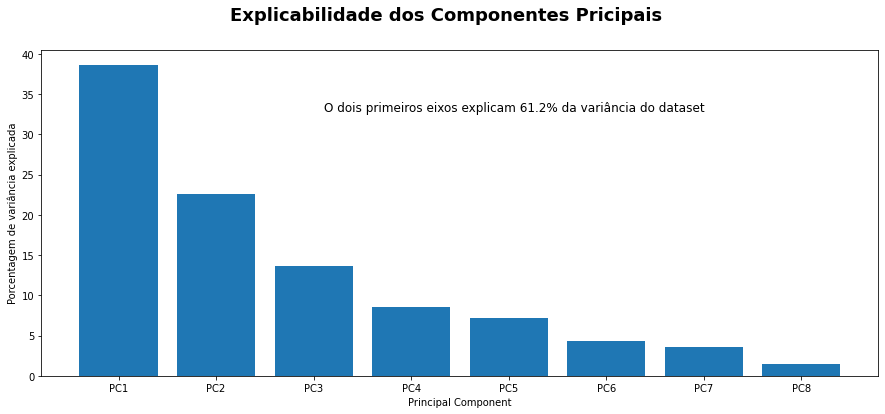

In [24]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.figure(figsize=(15, 6)) 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Porcentagem de variância explicada')
plt.xlabel('Principal Component')
plt.suptitle('Explicabilidade dos Componentes Pricipais', size=18, weight='bold')
plt.annotate(
    text=f'O dois primeiros eixos explicam {per_var[:2].sum():.1f}% da variância do dataset',
    xy=(0.3,0.7), xycoords='figure fraction', size=12
)
plt.show()

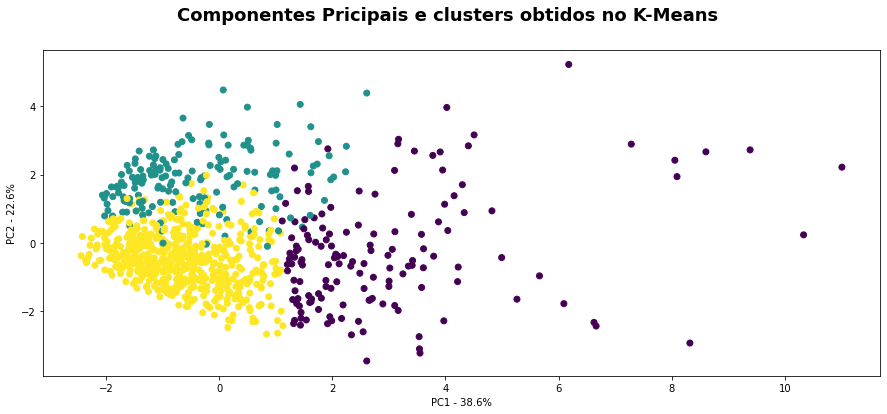

In [23]:
pca_df = pd.DataFrame(pca_data, columns=labels)

plt.figure(figsize=(15, 6))
plt.suptitle('Componentes Pricipais e clusters obtidos no K-Means', size=18, weight='bold')
plt.scatter(pca_df.PC1, pca_df.PC2, c=df['Grupo'])
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

plt.show()